<a href="https://colab.research.google.com/github/OmdenaAI/la-usa-chapter-open-data/blob/main/visualizations/LA_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OMDENA - LOS ANGELES CHAPTER**

## ***Los Angeles OPEN DATA CHALLENGE***
##**Los Angeles Crime Data (2020 : Feb 2023)**

## **Overview of Project:**
Challange:
URL : https://omdena.com/projects/analyzing-open-data-about-los-angeles-metropolitan-area/

Github: https://github.com/OmdenaAI/la-usa-chapter-open-data

GSheets: https://docs.google.com/spreadsheets/d/1iagwjFifZ7Q0eKiVTPUBJs1UmeUrX1Z68Xp8Xlyvxr8/edit#gid=0

Period: Feb - Mar 2023


In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from shapely.geometry import Point
from matplotlib.ticker import FuncFormatter
import warnings
from warnings import filterwarnings

In [114]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [115]:
!touch "/content/gdrive/MyDrive/LA  Crime Data/Crime_Data_from_2020_to_Present..csv"
df = pd.read_csv("/content/gdrive/MyDrive/LA  Crime Data/Crime_Data_from_2020_to_Present..csv")
df.head()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rp_ Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
0,10304468,01-08-2020 00:00,01-08-2020 00:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01-02-2020 00:00,01-01-2020 00:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01-01-2020 00:00,01-01-2020 00:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01-01-2020 00:00,01-01-2020 00:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [116]:
df.tail()

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rp_ Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Status,Status_Desc,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON
577564,220506760,03/14/2022 12:00:00 AM,03/13/2022 12:00:00 AM,1330,5,Harbor,503,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,25500 PINE CREEK LN,NaN,33.7911,-118.2844
577565,221117203,12-07-2022 00:00,11/22/2022 12:00:00 AM,1700,11,Northeast,1184,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,1500 SARGENT PL,NaN,34.0790,-118.2533
577566,220109037,03/26/2022 12:00:00 AM,03/25/2022 12:00:00 AM,1740,1,Central,138,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,3RD,SAN PEDRO,34.0473,-118.2425
577567,220220394,11/18/2022 12:00:00 AM,11/18/2022 12:00:00 AM,1705,2,Rampart,249,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,1100 W 6TH ST,NaN,34.0541,-118.2621
577568,221709475,05/30/2022 12:00:00 AM,05/29/2022 12:00:00 AM,1400,17,Devonshire,1735,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17100 TULSA ST,NaN,34.2685,-118.5000


In [117]:
df.describe()

,DR_NO,TIME_OCC,AREA,Rp_ Dist_No,Part_1-2,Crm_Cd,Vict_Age,Premis_Cd,Weapon_Used_Cd,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LAT,LON
count,5.775690e+05,577569.000000,577569.000000,577569.000000,577569.000000,577569.000000,577569.000000,577561.000000,203086.000000,577562.000000,43941.000000,1497.000000,45.000000,577569.000000,577569.000000
mean,2.108904e+08,1337.383968,10.740327,1120.357777,1.415490,502.388321,30.022531,302.354408,361.983736,502.119656,955.368631,982.752839,989.466667,33.939802,-117.889890
std,8.114219e+06,653.853378,6.080941,608.098669,0.492807,208.506406,21.675937,215.833103,123.705570,208.292382,114.700793,53.785041,31.306839,2.132969,7.399485
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.016092e+08,900.000000,6.000000,625.000000,1.000000,330.000000,12.000000,101.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.012400,-118.429700
50%,2.110131e+08,1415.000000,11.000000,1143.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058200,-118.321600
75%,2.204072e+08,1900.000000,16.000000,1621.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163200,-118.273900
max,2.321056e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [118]:
df['DATE_OCC'] = df['DATE_OCC'].str.extract(r'(\d{2}/\d{2}/\d{4})')

In [119]:
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'], format='%m/%d/%Y')

In [120]:
df['Day'] = df['DATE_OCC'].dt.day_name()

In [121]:
df['Month'] = df['DATE_OCC'].dt.month_name()

In [122]:
df['Year'] = df['DATE_OCC'].dt.year

In [123]:
df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rp_ Dist_No', 'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON', 'Day', 'Month', 'Year'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577569 entries, 0 to 577568
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           577569 non-null  int64         
 1   Date_Rptd       577569 non-null  object        
 2   DATE_OCC        342437 non-null  datetime64[ns]
 3   TIME_OCC        577569 non-null  int64         
 4   AREA            577569 non-null  int64         
 5   AREA_NAME       577569 non-null  object        
 6   Rp_ Dist_No     577569 non-null  int64         
 7   Part_1-2        577569 non-null  int64         
 8   Crm_Cd          577569 non-null  int64         
 9   Crm_Cd_Desc     577569 non-null  object        
 10  Mocodes         497977 non-null  object        
 11  Vict_Age        577569 non-null  int64         
 12  Vict_Sex        501801 non-null  object        
 13  Vict_Descent    501797 non-null  object        
 14  Premis_Cd       577561 non-null  flo

In [125]:
df.shape

(577569, 31)

In [126]:
df.isnull()
# if the value is null it returns True, and False values are other than null.

,DR_NO,Date_Rptd,DATE_OCC,TIME_OCC,AREA,AREA_NAME,Rp_ Dist_No,Part_1-2,Crm_Cd,Crm_Cd_Desc,...,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LOCATION,Cross_Street,LAT,LON,Day,Month,Year
0,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,True,True,True
1,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,True,True,False,True,False,False,True,True,True
4,False,False,True,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577564,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,False
577565,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,False
577566,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,False,False,False,False,False,False
577567,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,False,False,False,False,False


In [127]:
df['Day'].value_counts()

Friday       51705
Saturday     49547
Monday       49375
Wednesday    48460
Thursday     48398
Sunday       47634
Tuesday      47318
Name: Day, dtype: int64

In [128]:
df['Month'].value_counts()

August       30245
July         29913
October      29841
May          29636
January      29579
June         28839
September    27969
December     27943
March        27744
April        27408
November     27382
February     25938
Name: Month, dtype: int64

In [129]:
#check missing values
missing = df.isnull().sum()
missing.sort_values(ascending=False)
#There are Null values as data in not cleaned 

Crm_Cd_4          577524
Crm_Cd_3          576072
Crm_Cd_2          533628
Cross_Street      481263
Weapon_Desc       374483
Weapon_Used_Cd    374483
Year              235132
DATE_OCC          235132
Month             235132
Day               235132
Mocodes            79592
Vict_Descent       75772
Vict_Sex           75768
Premis_Desc          271
Premis_Cd              8
Crm_Cd_1               7
Rp_ Dist_No            0
TIME_OCC               0
AREA                   0
LON                    0
LAT                    0
AREA_NAME              0
LOCATION               0
Part_1-2               0
Date_Rptd              0
Crm_Cd                 0
Status_Desc            0
Status                 0
Crm_Cd_Desc            0
Vict_Age               0
DR_NO                  0
dtype: int64

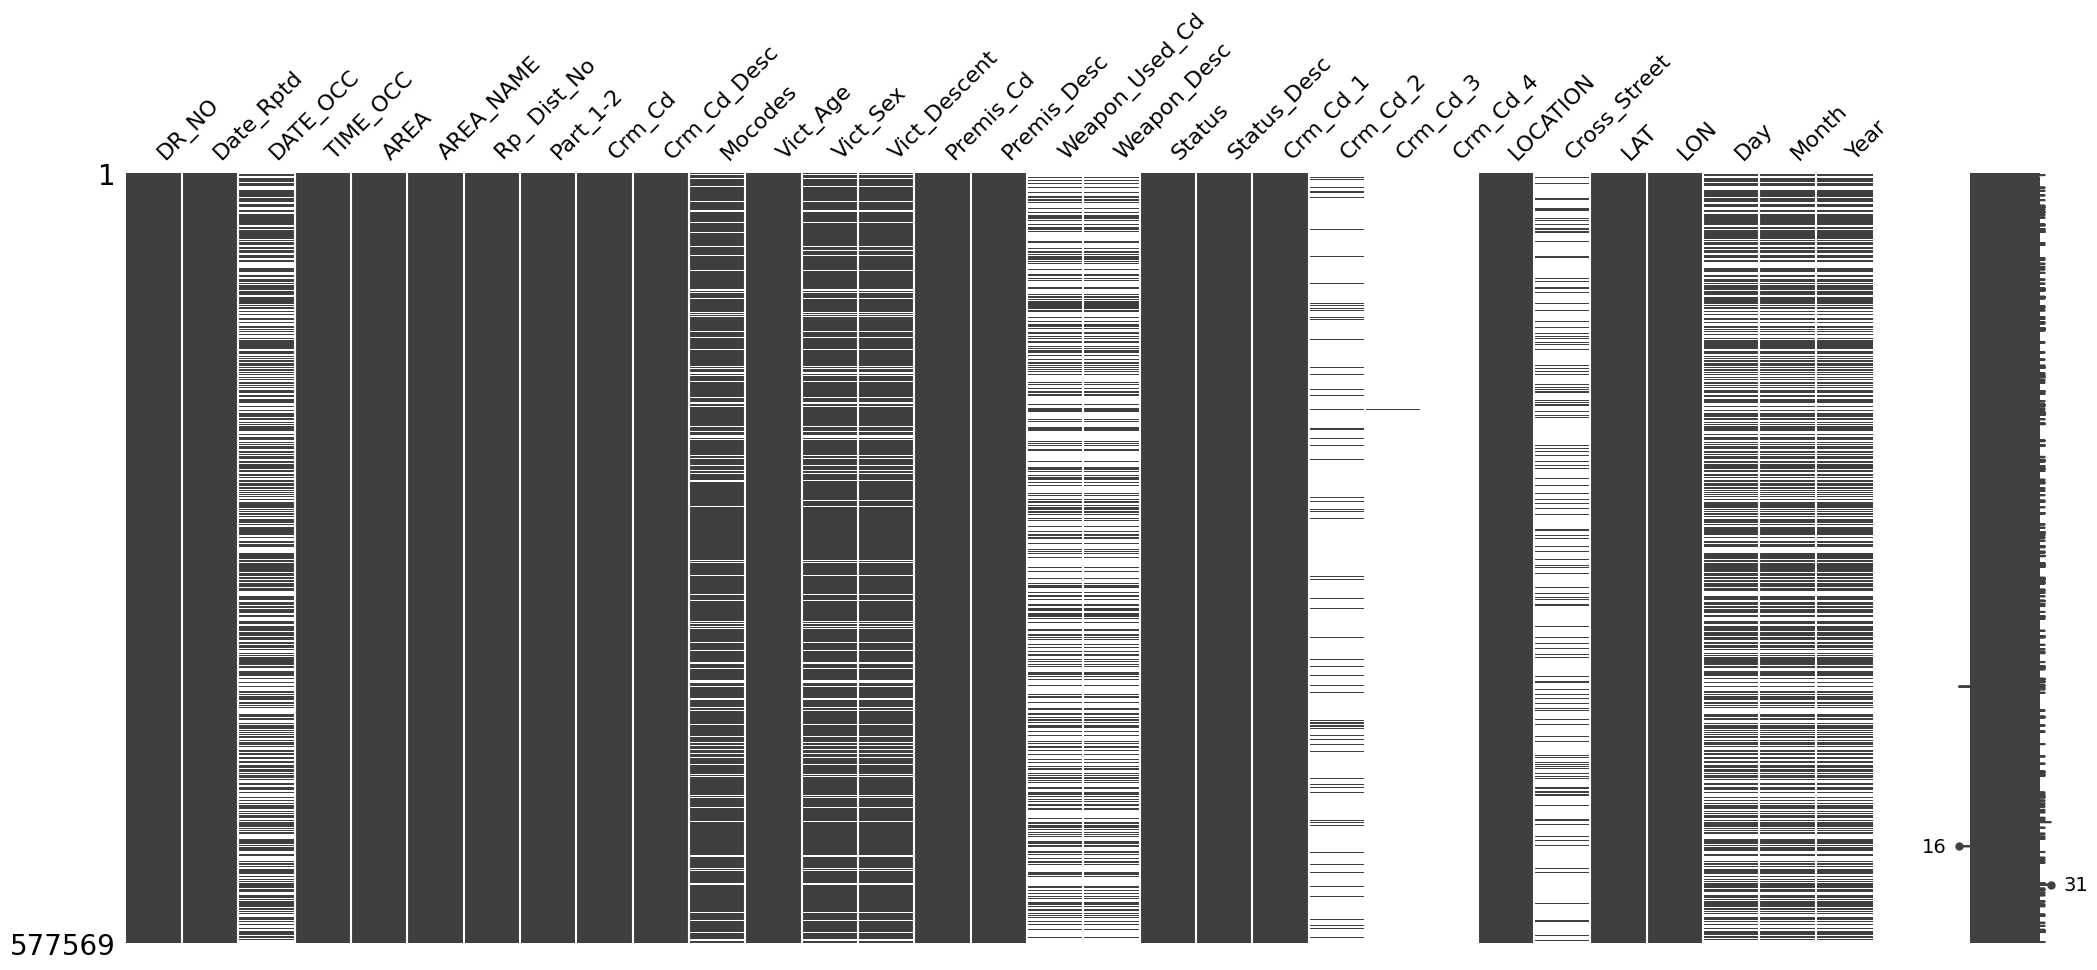

In [130]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()

In [131]:
# Any missing values?
df.isnull().values.any()

True

In [132]:
## Total number of missing values
df.isnull().sum().sum()

4089399

In [133]:
# Replace using median 
median = df['Crm_Cd_4'].median()
df['Crm_Cd_4'].fillna(median, inplace=True)

In [134]:
df.fillna(0,inplace=True)

In [135]:
missing = df.isnull().sum()
missing.sort_values(ascending=False)
#There are no Null values as data cleaned 

DR_NO             0
Weapon_Used_Cd    0
Month             0
Day               0
LON               0
LAT               0
Cross_Street      0
LOCATION          0
Crm_Cd_4          0
Crm_Cd_3          0
Crm_Cd_2          0
Crm_Cd_1          0
Status_Desc       0
Status            0
Weapon_Desc       0
Premis_Desc       0
Date_Rptd         0
Premis_Cd         0
Vict_Descent      0
Vict_Sex          0
Vict_Age          0
Mocodes           0
Crm_Cd_Desc       0
Crm_Cd            0
Part_1-2          0
Rp_ Dist_No       0
AREA_NAME         0
AREA              0
TIME_OCC          0
DATE_OCC          0
Year              0
dtype: int64

In [136]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  16


In [137]:
#LIST OF NUMERICAL FEATURES
df[numerical_features].head()

,DR_NO,TIME_OCC,AREA,Rp_ Dist_No,Part_1-2,Crm_Cd,Vict_Age,Premis_Cd,Weapon_Used_Cd,Crm_Cd_1,Crm_Cd_2,Crm_Cd_3,Crm_Cd_4,LAT,LON,Year
0,10304468,2230,3,377,2,624,36,501.0,400.0,624.0,0.0,0.0,998.0,34.0141,-118.2978,0.0
1,190101086,330,1,163,2,624,25,102.0,500.0,624.0,0.0,0.0,998.0,34.0459,-118.2545,0.0
2,200110444,1200,1,155,2,845,0,726.0,0.0,845.0,0.0,0.0,998.0,34.0448,-118.2474,2020.0
3,191501505,1730,15,1543,2,745,76,502.0,0.0,745.0,998.0,0.0,998.0,34.1685,-118.4019,0.0
4,191921269,415,19,1998,2,740,31,409.0,0.0,740.0,0.0,0.0,998.0,34.2198,-118.4468,0.0


In [138]:
# Types of numerical variables - discrete & continuous variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 4


['AREA', 'Part_1-2', 'Crm_Cd_4', 'Year']

In [139]:
#continuous features
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['id']]
print("Continuous feature Count {}".format(len(continuous_features)))
continuous_features

Continuous feature Count 12


['DR_NO',
 'TIME_OCC',
 'Rp_ Dist_No',
 'Crm_Cd',
 'Vict_Age',
 'Premis_Cd',
 'Weapon_Used_Cd',
 'Crm_Cd_1',
 'Crm_Cd_2',
 'Crm_Cd_3',
 'LAT',
 'LON']

# **Visualization**

In [140]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [160]:
dfg = pd.DataFrame({'days':['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], 'counts':[49375,
        47318,48460,48398,51705,49547,47634]})

fig = px.line(dfg, x='days', y='counts', title='Crime Rate Per Day')
fig.update_traces(
    mode="markers+lines",
    marker=dict(size=10, color="orange", line=dict(width=3, color="black"))
)
fig.update_layout(
    plot_bgcolor="#a6ffff",
    paper_bgcolor="#a6f2ff",
    xaxis_title="Days",
    yaxis_title="Counts"
)
fig.show()

In [142]:
dfg = pd.DataFrame({'month':['January','February','March','April','May','June','July','August','September','October','November','December'], 'counts':[29579,
        25938, 27744,27408,29636,28839,29913,30245,27969,29841,27382,27943]})

fig = px.line(dfg, x='month', y='counts', title='Crime Rate Per Month')
fig.update_traces(
    mode="markers+lines",
    marker=dict(size=10, color="orange", line=dict(width=3, color="black"))
)
fig.update_layout(
    plot_bgcolor="#a6ffff",
    paper_bgcolor="#a6f2ff",
    xaxis_title="Months",
    yaxis_title="Counts"
)
fig.show()

In [143]:
dfg = pd.DataFrame({'years':['2020','2021','2022'], 'counts':[125065,132563,130810]})

fig = px.line(dfg, x='years', y='counts', title='Crime Rate Per Year')
fig.update_traces(
    mode="markers+lines",
    marker=dict(size=10, color="orange", line=dict(width=3, color="black"))
)
fig.update_layout(
    plot_bgcolor="#a6ffff",
    paper_bgcolor="#a6f2ff",
    xaxis_title="Years",
    yaxis_title="Counts"
)
fig.show()

In [144]:
# Assuming df contains the required data
df['Vict_Sex'].value_counts()
dfg = pd.DataFrame({'gender':['Male','Female'], 'counts':[1370530,1244121]})

# Define a custom color palette
colors = ['#210088', '#FFB7B2']

# Create the bar chart figure using Plotly
fig = go.Figure(go.Bar(
    x=dfg['gender'],
    y=dfg['counts'],
    marker_color=colors,
    text=dfg['counts'],
    textposition='auto',
))

# Customize the figure layout and style
fig.update_traces(marker_line_width=2.5, opacity=0.7)
fig.update_layout(
    title={
        'text': '<br><b>Gender of Victims</b>',
        'font': dict(size=25)
    },
    xaxis=dict(title='Gender', tickfont=dict(size=18)),
    yaxis=dict(title='Counts', tickfont=dict(size=18)),
    showlegend=False,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    margin=dict(t=150, l=0, r=0, b=0),
)

# Display the final figure
fig.show()

In [145]:
# Assuming df contains the required data
df['Vict_Age'].value_counts()

# removing the values below one for the "Vict Age" column
df.drop(df[df['Vict_Age'] < 1].index, axis=0, inplace=True)

fig = go.Figure(data=[go.Histogram(
    x=df['Vict_Age'],
    nbinsx=20,
    marker_color='#210088',
    opacity=0.75,
    # Add border lines to the bars
    marker_line_color='white',
    marker_line_width=1
)])

fig.update_layout(
    title={
        'text': '<br><b>Victim by Age</b>',
        'font': dict(size=25)
    },
    xaxis=dict(title='Age', tickfont=dict(size=18)),
    yaxis=dict(title='Counts', tickfont=dict(size=18)),
    showlegend=False,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    margin=dict(t=150, l=0, r=0, b=0),
)

fig.show()

In [146]:
# Create a dataframe with the labels and corresponding values
labels = df.Status_Desc.unique()
values = [len(df[df.Status_Desc == each]) for each in labels]
df_pie = pd.DataFrame({'Status_Desc': labels, 'Count': values})

# Create the pie chart figure
fig = px.pie(df_pie, values='Count', names='Status_Desc', hole=.3)

# Set the chart title and customize the legend
fig.update_layout(title_text='Status Distribution', showlegend=True, legend_title='Status')

fig.show()

# **Crimes at different Premises in Los Angeles**

In [147]:
# Assuming df contains the required data
grouped_data = df.groupby(['AREA_NAME', 'Crm_Cd_Desc']).size().reset_index(name='Frequency')

fig = px.density_heatmap(grouped_data, x="AREA_NAME", y="Crm_Cd_Desc", z="Frequency", 
                         title="Crime Frequency by Area and Type", nbinsx=20, nbinsy=50)
fig.show()

In [148]:
grouped_data = df.groupby(['Vict_Age', 'Crm_Cd_Desc']).size().reset_index(name='Frequency')
grouped_data.drop(grouped_data[grouped_data['Vict_Age'] < 1].index, axis=0, inplace=True)
import plotly.express as px
fig = px.bar(grouped_data[grouped_data['Vict_Age'] < 20], x="Vict_Age", y="Frequency", color="Crm_Cd_Desc",title="Crime Types By Victim Less then 20 Years Old")
fig.show()

In [163]:
grouped_data = df.groupby(['Vict_Age', 'Crm_Cd_Desc']).size().reset_index(name='Frequency')
grouped_data.drop(grouped_data[grouped_data['Vict_Age'] < 1].index, axis=0, inplace=True)
import plotly.express as px
fig = px.bar(grouped_data[grouped_data['Vict_Age'] > 20], x="Vict_Age", y="Frequency", color="Crm_Cd_Desc",title="Crime Types By Victim more than 20 Years Old")
fig.show()

In [151]:
grouped_data = df.groupby(['Vict_Age', 'Crm_Cd_Desc']).size().reset_index(name='Frequency')
grouped_data.drop(grouped_data[grouped_data['Vict_Age'] < 1].index, axis=0, inplace=True)
import plotly.express as px
fig = px.bar(grouped_data[grouped_data['Vict_Age'] > 60], x="Vict_Age", y="Frequency", color="Crm_Cd_Desc",title="Crime Types By Victim greater then 60 Years Old")
fig.show()

In [152]:
# Get the count of each crime type
crime_type = df.groupby('Premis_Desc').size().reset_index(name='counts').sort_values(by='counts', ascending=False)

# Get the top 10 crime types by count
top_10_crime_type = crime_type.head(10)

# Create the bar chart figure
fig = px.bar(top_10_crime_type,
             y='Premis_Desc',
             x='counts',
             color='counts',
             orientation='h',
             color_continuous_scale='Viridis')

# Set the chart title and axes labels
fig.update_layout(
    title={
        'text': '<br><b>Top 10 Crime Premis Desc</b>',
        'font': dict(size=25)
    },
    xaxis=dict(title='Counts', tickfont=dict(size=18)),
    yaxis=dict(title='Premis Desc', tickfont=dict(size=18)),
    margin=dict(t=150, l=0, r=0, b=0),
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()

# **Category of Crimes in each region**

###Categories of Crime happen in different region

In [153]:
# Get the count of each area name and sort them in descending order
area_counts = df['AREA_NAME'].value_counts().sort_values(ascending=True)

# Create the bar chart figure with reversed orientation
fig = px.bar(area_counts,
             x=area_counts.values,
             y=area_counts.index,
             orientation='h'[::-1],
             color=area_counts.values,
             color_continuous_scale='Viridis')

# Set the chart title and axes labels
fig.update_layout(
    title={
        'text': '<br><b>Category of Crime in Regions</b>',
        'font': dict(size=25)
    },
    xaxis=dict(title='Count', tickfont=dict(size=18)),
    yaxis=dict(title='Area Name', tickfont=dict(size=18)),
    margin=dict(t=150, l=0, r=0, b=0),
    plot_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()

In [154]:
# Get count of each crime category
category_counts = df['Crm_Cd_Desc'].value_counts()

# Create a bar chart using Plotly Express
fig = px.bar(x=category_counts.values, y=category_counts.index, orientation='h', 
             color=category_counts.values, color_continuous_scale='Viridis')

# Add labels and title
fig.update_layout(title='Category of Crime',
                  xaxis={'title': 'Count'},
                  yaxis={'title': 'Crime Category'})

# Display the chart
fig.show()


In [162]:
import plotly.graph_objects as go

# Create pivot table
df_pivot = pd.pivot_table(df, index='Crm_Cd_Desc', columns='AREA_NAME', aggfunc='size', fill_value=0)

# Create heatmap
fig = go.Figure(data=go.Heatmap(
                   z=df_pivot.values,
                   x=df_pivot.columns,
                   y=df_pivot.index,
                   colorscale='Viridis',
                   colorbar=dict(title='Counts')
                 ))

fig.update_layout(title='Category of Crime in Regions',
                  xaxis={'title': 'Area Name'},
                  yaxis={'title': 'Crime Category'},
                  height=800,
                  width=1200)

fig.show()

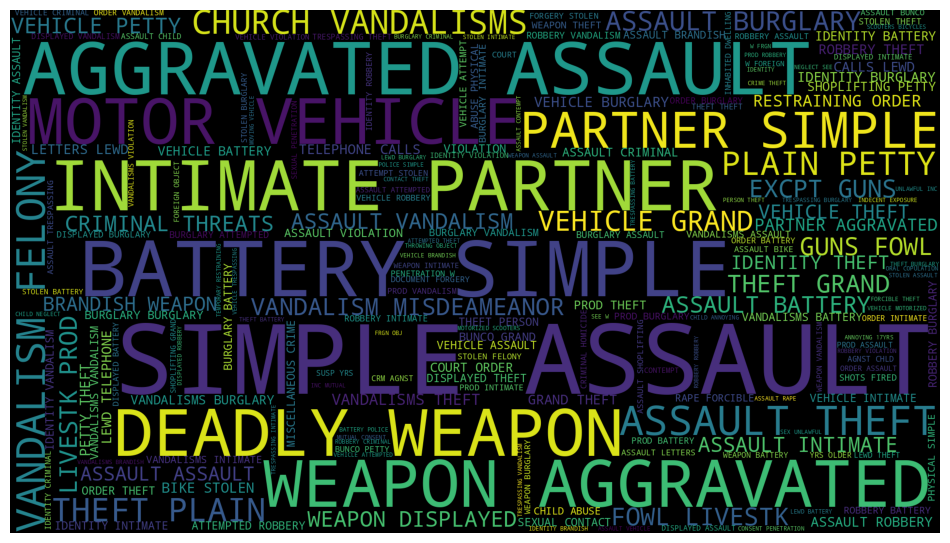

In [156]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

# Set the size of the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Generate the word cloud
wordcloud = WordCloud(
    background_color='black',   # Set the background color of the word cloud to black
    width=1920,                 # Set the width of the word cloud image to 1920 pixels
    height=1080                 # Set the height of the word cloud image to 1080 pixels
).generate(" ".join(df.Crm_Cd_Desc))  # Combine all the text in the "Crm_Cd_Desc" column of the "df" DataFrame into a single string, and use it to generate the word cloud

# Display the word cloud on the plot
ax.imshow(wordcloud)

# Remove the axis ticks and labels
ax.axis('off')

# Save the word cloud as a PNG file named "graph.png"
plt.savefig('graph.png', dpi=300, bbox_inches='tight')

# Display the word cloud
plt.show()
